# Тестовое задание 

План выполнения:


*   Выполнить подключение к любому API из раздела Shopping
(`https://github.com/public-apis/public-apis#shopping`);
*   Получить данные;
*   Выполнить базовый анализ данных и сделать общие выводы.

###Источник данных
Из предложенных на GitHub источников данных (`14 источников в категории Shopping`):


*   3 источника устарели (*ссылки неактивны, поиск в Google не дает актуальных результатов*) - `Digi-Key, Flipkart Marketplace, Octopart`;
*   2 источника данных не разрешают регистрацию для пользователей из России - `Best Buy, Lazada`;
*   6 источников предоставляют только ключи интеграции - `Etsy, Mercadolibre, Shopee, Rappi, Tokopedia, WooCommerce`;


Из трех доступных источников данных `(EBay, OLX, Dummy Products)` наиболее оптимальным для выполнения задания является - `Dummy Products` (`https://dummyjson.com`), т.к. для выгрузки данных `не требуется` дополнительная регистрация и авторизация аккаунта от платформы в роли "Developer".

###Задача
Представим, что мы владельцы маркетплейса, планируем выход на новый рынок и получили базу данных пользователей конкурента (с многолетним опытом на этом рынке) и постов пользователей на его платформе. Разделим анализ на 2 этапа:

*   проанализируем базу пользователей, составим представление о среднестатистическом покупателе, определим параметры запуска нашего маркетплейса - возрастные категории товаров, географию доставки, параметры платежной системы для оплаты на маркетплейсе;
*   сопоставим данные пользователей с данными постов на платформе нашего конкурента, проанализируем основные теги постов пользователей и половозростную диаграмму авторов (=наиболее активных пользователей), чтобы грамотно построить маркетинговую стратегию запуска.










##Выгрузка данных


In [1]:
#для начала устанавливаем библиотеку HTTP запросов
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#импортируем необходимые для работы библиотеки
import requests
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#URL запроса получим на сайте источника данных
url = 'https://dummyjson.com/users?skip=0&limit=100'

In [4]:
#с помощью GET запроса библиотеки 'requests' получаем данные
#в данном случае не требуется указания токена и параметров params, headers
response = requests.get(url)

In [5]:
#проверим код ответа от сервера
response

<Response [200]>

In [6]:
#данные выгружаются в формате JSON - прочтем их с помощью соответствующей библиотеки
response = json.loads(response.content)


Сейчас данные представлены в формате словаря JSON. Чтобы конвертировать их в датафрейм используем функцию Pandas `json_normalize()`.






In [7]:
#форматируем данные в датафрейм и присваиваем соответсвующее название
users = pd.json_normalize(response, record_path =['users'])

In [8]:
users.head()

,id,firstName,lastName,maidenName,age,gender,email,phone,username,password,...,bank.iban,company.address.address,company.address.city,company.address.coordinates.lat,company.address.coordinates.lng,company.address.postalCode,company.address.state,company.department,company.name,company.title
0,1,Terry,Medhurst,Smitham,50,male,atuny0@sohu.com,+63 791 675 8914,atuny0,9uQFF1Lh,...,NO17 0695 2754 967,629 Debbie Drive,Nashville,36.208114,-86.586212,37076,TN,Marketing,Blanda-O'Keefe,Help Desk Operator
1,2,Sheldon,Quigley,Cole,28,male,hbingley1@plala.or.jp,+7 813 117 7139,hbingley1,CQutx25i8r,...,MD63 L6YC 8YH4 QVQB XHIK MTML,8821 West Myrtle Avenue,Glendale,33.540430,-112.248839,85305,AZ,Services,Aufderhar-Cronin,Senior Cost Accountant
2,3,Terrill,Hills,Hoeger,38,male,rshawe2@51.la,+63 739 292 7942,rshawe2,OWsTbMUgFc,...,AT24 1095 9625 1434 9703,18 Densmore Drive,Essex,44.492953,-73.101883,05452,VT,Marketing,Lindgren LLC,Mechanical Systems Engineer
3,4,Miles,Cummerata,Maggio,49,male,yraigatt3@nature.com,+86 461 145 4186,yraigatt3,sRQxjPfdS,...,KZ43 658B M6VS TZOU OXSO,210 Green Road,Manchester,41.790910,-72.511951,06042,CT,Business Development,Wolff and Sons,Paralegal
4,5,Mavis,Schultz,Yundt,38,male,kmeus4@upenn.edu,+372 285 771 1911,kmeus4,aUTdmmmbH,...,IT41 T114 5127 716J RGYB ZRUX DSJ,8398 West Denton Lane,Glendale,33.515353,-112.240812,85305,AZ,Support,Adams Inc,Web Developer I


Наш запрос выгрузил данные о пользователях, исследуем их и составим профили пользователей платформы. 

Также на сайте доступен датасет с постами пользователей, выгрузим его чтобы обогатить наш датафрейм и провести дополнительный анализ.

In [9]:
#URL запроса из источника данных
one_more_url = 'https://dummyjson.com/posts?skip=0&limit=150'

In [10]:
#формируем GET запрос
one_more_response = requests.get(one_more_url)

In [11]:
#проверяем код ответа от сервера
one_more_response

<Response [200]>

In [12]:
#данные выгружаются в формате JSON - прочтем их с помощью соответствующей библиотеки
one_more_response = json.loads(one_more_response.content)

In [13]:
#форматируем данные в датафрейм и присваиваем соответсвующее название
posts = pd.json_normalize(one_more_response, record_path =['posts'])

In [14]:
#еще один готовый к работе датафрейм
posts.head()

,id,title,body,userId,tags,reactions
0,1,His mother had always taught him,His mother had always taught him not to ever t...,9,"[history, american, crime]",2
1,2,He was an expert but not in a discipline,He was an expert but not in a discipline that ...,13,"[french, fiction, english]",2
2,3,Dave watched as the forest burned up on the hill.,Dave watched as the forest burned up on the hi...,32,"[magical, history, french]",5
3,4,All he wanted was a candy bar.,All he wanted was a candy bar. It didn't seem ...,12,"[mystery, english, american]",1
4,5,Hopes and dreams were dashed that day.,Hopes and dreams were dashed that day. It shou...,41,"[crime, mystery, love]",2


##Предобработка данных

In [15]:
#для начала получим основную информацию о датафрейме
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               100 non-null    int64  
 1   firstName                        100 non-null    object 
 2   lastName                         100 non-null    object 
 3   maidenName                       100 non-null    object 
 4   age                              100 non-null    int64  
 5   gender                           100 non-null    object 
 6   email                            100 non-null    object 
 7   phone                            100 non-null    object 
 8   username                         100 non-null    object 
 9   password                         100 non-null    object 
 10  birthDate                        100 non-null    object 
 11  image                            100 non-null    object 
 12  bloodGroup             

После просмотра информации видим:


1.   В двух столбцах присутствуют пропуски;
2.   У некоторых столбцов тип данных не совпадает с содержимым;
3.   Название колонок необходимо привести к единообразному стилю.

In [16]:
#приведем названия колонок к строчному формату
users.columns = users.columns.str.lower()

In [17]:
#переименуем названия колонок в соответствии с общепринятым стилем
users = users.rename(columns=
               {'id' : 'user_id',
                'firstname' : 'first_name',
                'lastname' : 'last_name',
                'maidenname' : 'maiden_name',
                'birthdate' : 'birth_date',
                'bloodgroup' : 'blood_group',
                'macaddress' : 'mac_address',
                'useragent' : 'user_agent',
                'hair.color' : 'hair_color',
                'hair.type' : 'hair_type',
                'address.address' : 'home_address',
                'address.city' : 'home_city',
                'address.coordinates.lat' : 'home_coordinates_lat',
                'address.coordinates.lng' : 'home_coordinates_lng',
                'address.postalcode' : 'home_postal_code',
                'address.state' : 'home_state',
                'bank.cardexpire' : 'bank_card_expire',
                'bank.cardnumber' : 'bank_card_number',
                'bank.cardtype' : 'bank_card_type',
                'bank.currency' : 'bank_currency',
                'bank.iban' : 'bank_iban',
                'company.address.address' : 'company_address',
                'company.address.city' : 'company_city',
                'company.address.coordinates.lat' : 'company_coordinates_lat',
                'company.address.coordinates.lng' : 'company_coordinates_lng',
                'company.address.postalcode' : 'company_postal_code',
                'company.address.state' : 'company_state',
                'company.department' : 'company_department', 
                'company.name' : 'company_name', 
                'company.title' : 'company_title'
})

In [18]:
#посчитаем долю пропусков по стобцам 
users.isna().mean().to_frame(name="nans").query("nans > 0")["nans"]

home_city       0.02
company_city    0.02
Name: nans, dtype: float64

По `2%` пропусков имеют колонки с текстовым значением `городом домашнего и рабочего адреса`, при этом остальныне реквизиты адреса присутствуют во всех колонках - значит, исследователькому анализу эти пропуски не помешают - оставим их в текущем виде. 

In [19]:
#проверим наличие дубликатов
users.duplicated().sum()

0

Полные дубли отсуствуют, далее проверим наличие неявных дубликатов в тех столбцах, по которым планируем группировку данных или подсчет уникальных значечний -

In [20]:
users['bank_card_type'].sort_values().unique()

array(['americanexpress', 'bankcard', 'china-unionpay',
       'diners-club-carte-blanche', 'diners-club-enroute',
       'diners-club-us-ca', 'instapayment', 'jcb', 'laser', 'maestro',
       'mastercard', 'solo', 'switch', 'visa', 'visa-electron'],
      dtype=object)

In [21]:
users['bank_currency'].sort_values().unique()

array(['Ariary', 'Baht', 'Dalasi', 'Denar', 'Dollar', 'Dong', 'Euro',
       'Forint', 'Franc', 'Gourde', 'Hryvnia', 'Koruna', 'Krona', 'Krone',
       'Lempira', 'Manat', 'Peso', 'Real', 'Rial', 'Ringgit', 'Ruble',
       'Rupee', 'Rupiah', 'Yen', 'Yuan Renminbi', 'Zloty'], dtype=object)

Неявные дубликаты значений отсуствуют, можем двигаться дальше - 

In [22]:
#приведем колонку с датами к нужному типу данных
users['birth_date'] = pd.to_datetime(users['birth_date'], format='%Y-%m-%d')

In [23]:
#приведем другие колонки к нужному типу данных
users[['home_postal_code', 'bank_card_number', 'company_postal_code']] = \
users[['home_postal_code', 'bank_card_number', 'company_postal_code']].astype('int') 

In [24]:
#проверим правильность
users.dtypes

user_id                             int64
first_name                         object
last_name                          object
maiden_name                        object
age                                 int64
gender                             object
email                              object
phone                              object
username                           object
password                           object
birth_date                 datetime64[ns]
image                              object
blood_group                        object
height                              int64
weight                            float64
eyecolor                           object
domain                             object
ip                                 object
mac_address                        object
university                         object
ein                                object
ssn                                object
user_agent                         object
hair_color                        

In [25]:
#по аналогии проведем предобработку posts
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         150 non-null    int64 
 1   title      150 non-null    object
 2   body       150 non-null    object
 3   userId     150 non-null    int64 
 4   tags       150 non-null    object
 5   reactions  150 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [26]:
#приведем названия колонок к строчному формату
posts.columns = posts.columns.str.lower()

In [27]:
#переименуем названия колонок
posts = posts.rename(columns=
               {'id' : 'post_id',
                'userid' : 'user_id'
})

In [28]:
#проверим наличие дубликатов
posts.isna().mean().to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: float64)

Полные дубликаты отсутствуют. 

Также все столбцы этого датафрейма имеют соответствующий тип данных.

В дальнейшем имеет смысл объединить датафреймы по ключу `'user_id'` с помощью функции `join`, но на текущем этапе это затруднит работу, т.к. в пользователи могут оставлять по нескольку комментариев, что приведет к дублированию данных в едином датафреме.

##Исследовательский анализ данных

####Анализ пользователей

In [29]:
#еще раз ознакомимся со структурой данных
users.head()

,user_id,first_name,last_name,maiden_name,age,gender,email,phone,username,password,...,bank_iban,company_address,company_city,company_coordinates_lat,company_coordinates_lng,company_postal_code,company_state,company_department,company_name,company_title
0,1,Terry,Medhurst,Smitham,50,male,atuny0@sohu.com,+63 791 675 8914,atuny0,9uQFF1Lh,...,NO17 0695 2754 967,629 Debbie Drive,Nashville,36.208114,-86.586212,37076,TN,Marketing,Blanda-O'Keefe,Help Desk Operator
1,2,Sheldon,Quigley,Cole,28,male,hbingley1@plala.or.jp,+7 813 117 7139,hbingley1,CQutx25i8r,...,MD63 L6YC 8YH4 QVQB XHIK MTML,8821 West Myrtle Avenue,Glendale,33.540430,-112.248839,85305,AZ,Services,Aufderhar-Cronin,Senior Cost Accountant
2,3,Terrill,Hills,Hoeger,38,male,rshawe2@51.la,+63 739 292 7942,rshawe2,OWsTbMUgFc,...,AT24 1095 9625 1434 9703,18 Densmore Drive,Essex,44.492953,-73.101883,5452,VT,Marketing,Lindgren LLC,Mechanical Systems Engineer
3,4,Miles,Cummerata,Maggio,49,male,yraigatt3@nature.com,+86 461 145 4186,yraigatt3,sRQxjPfdS,...,KZ43 658B M6VS TZOU OXSO,210 Green Road,Manchester,41.790910,-72.511951,6042,CT,Business Development,Wolff and Sons,Paralegal
4,5,Mavis,Schultz,Yundt,38,male,kmeus4@upenn.edu,+372 285 771 1911,kmeus4,aUTdmmmbH,...,IT41 T114 5127 716J RGYB ZRUX DSJ,8398 West Denton Lane,Glendale,33.515353,-112.240812,85305,AZ,Support,Adams Inc,Web Developer I


В полученных нами данных представлена разнообразная информация - от ФИО пользователей и их даты рождения, до домашних и рабочих адресов.

Для начала посмотрим на распределение данных по полу и возрасту наших пользователей - 

In [30]:
#построим сводную таблицу с распределением пола пользователей
male_female = users.groupby('gender').agg({
    'user_id': 'nunique'}).reset_index().rename(
        columns={'gender':'Пол', 
                 'user_id':'Пользователей'
})

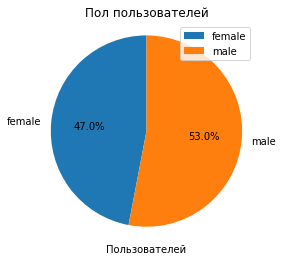

In [31]:
ax1 = plt.subplot()
ax1.pie(
    male_female['Пользователей'], 
    labels=male_female['Пол'], 
    radius=1.1, 
    autopct='%1.1f%%', 
    startangle=90
    )

plt.legend()
plt.xlabel('Пользователей')
plt.title('Пол пользователей')
plt.show()

Как видно на графике, доля мужчин и женщин среди пользователей приблезительно равна (что соответствует распределению полов в общемировом плагне).

Далее оценим возрастное распределение пользователей. Для удобства категорезируем пользователей на возрастные группы - 

In [32]:
#напишем функцию categorize_age()
def categorize_age(value):  
    if value <= 19:
        return '0-19'
    elif value <= 29: 
        return '20-29'
    elif value <= 39: 
        return '30-39'
    elif value <= 49: 
        return '40-49'
    return '50+'

In [33]:
#применим новую функцию
users['age_category'] = users['age'].apply(categorize_age)

In [34]:
#построим сводную таблицу с распределением возраста пользователей
ages_sex = users.pivot_table(
    index=['age_category', 'gender'], 
    values='user_id', 
    aggfunc=['nunique']).droplevel(0,axis=1).reset_index().rename(
        columns={
        'gender':'Пол', 
        'age_category':'Возрастная группа',
        'user_id' : 'Пользователей'
})

In [35]:
ages_sex

,Возрастная группа,Пол,Пользователей
0,0-19,female,3
1,0-19,male,2
2,20-29,female,9
3,20-29,male,18
4,30-39,female,15
5,30-39,male,16
6,40-49,female,19
7,40-49,male,15
8,50+,female,1
9,50+,male,2


In [36]:
#сделаем срез нашей сводной таблицы и построим графики в соответствии с полом автором
woman = ages_sex.query('Пол == "female"')

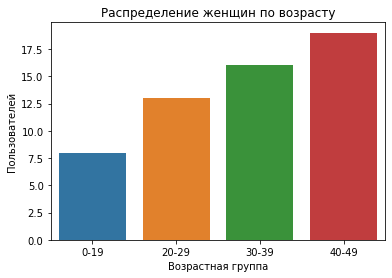

In [63]:
#воспользуемся библиотекой Seaborn, чтобы построить столбчатую диаграмму 
#первый график — распределение женщин по возрасту
sns.barplot(data=woman, x="Возрастная группа", y="Пользователей")
plt.title('Распределение женщин по возрасту');

In [38]:
man = ages_sex.query('Пол == "male"')

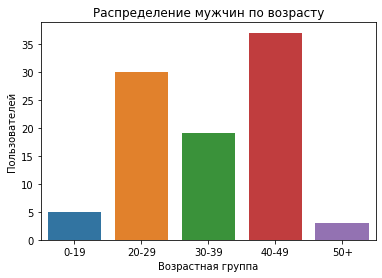

In [65]:
# второй график — распределение мужчин по возрасту
sns.barplot(data=man, x="Возрастная группа", y="Пользователей")
plt.title('Распределение мужчин по возрасту');

Большая часть пользователей имеет возраст 20-50 лет. 

Доли людей в возрасте до 30, 40 и 50 лет среди мужчин и женщин распределены не равномерно. 
Самая многочисленная группа среди женщин - `40-49`, самая малочисленная категория - `50+`. 

Среди мужчин пользователей наблюдается обратная тенденция - самая многочисленная группа пользователей `20-29`, самая малочисленная группа как и у женщин в категории `50+`. 

In [40]:
#составим сводную таблицу городов, где чаще всего проживают пользователи
users_city = users.pivot_table(
    index='home_city', 
    values=['user_id'], 
    aggfunc=['nunique']
).droplevel(0,axis=1).reset_index().rename(columns={
        'home_city':'Город проживания', 
        'user_id':'Пользователей'
}).sort_values(by='Пользователей', ascending=False)

In [41]:
users_city.head(10)

,Город проживания,Пользователей
28,Nashville,10
20,Glendale,8
2,Anchorage,7
39,Washington,7
25,Manchester,7
24,Louisville,6
16,Fayetteville,6
36,Savannah,4
27,Montgomery,3
31,Panama City,3


In [42]:
#составим сводную таблицу городов, где чаще всего работают пользователи
users_company_city = users.pivot_table(
    index='company_city', 
    values=['user_id'], 
    aggfunc=['nunique']
).droplevel(0,axis=1).reset_index().rename(columns={
        'company_city':'Город работы', 
        'user_id':'Пользователей'
}).sort_values(by='Пользователей', ascending=False)

In [43]:
users_company_city.head(10)

,Город работы,Пользователей
15,Fayetteville,11
18,Glendale,10
25,Nashville,9
33,Washington,7
22,Manchester,7
2,Anchorage,6
29,Pasadena,3
27,Panama City,3
19,Grand Junction,3
17,Glen Burnie,3


География продаж - ключ к успеху бизнеса. Зная точно, где живут и работают пользователи, можно выстраивать операционные бизнес-процессы с наменьшими издержками - оптимизируя затраты на логистику поставок и доставок, пункты выдачи. 

Исходя из сводных таблиц городов проживания и работы видим, что ТОП города частично совпадают, но поскольку данный рынок новый для нас, сложно точно оценить насколько эти города рядом.

В выгруженной базе пользователей присутствуют координаты (широта/долгота) каждого адреса пользователя - перенесем эти координаты на диаграмму рассеяния, чтобы сравнить географию домашних и рабочих адресов (где каждая точка будет равна одному конкретному адресу). 

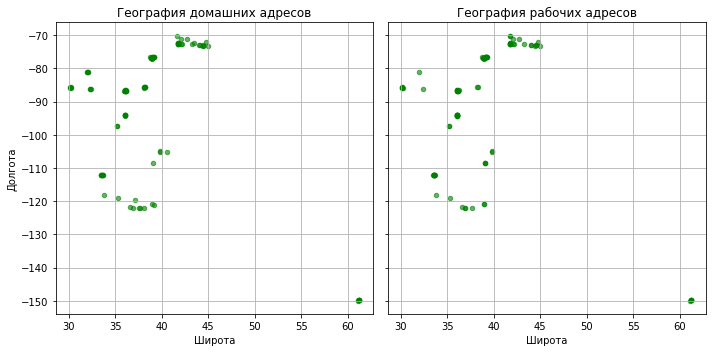

In [44]:
# первый график — домашние адреса клиентов 
ax1 = plt.subplot(1, 2, 1) 
users.plot(
    x='home_coordinates_lat', 
    y='home_coordinates_lng', 
    kind='scatter', 
    alpha=0.6, #данный параметр поможет нам увидеть плотность адресов в каждой отдельной точке, если они совпадают 
    color='g',
    figsize=(10, 5), 
    grid=True,  
    ax=ax1)
plt.ylabel('Долгота')
plt.xlabel('Широта') 
plt.title('География домашних адресов')

# второй график — рабочие адреса клиентов 
ax2 = plt.subplot(1, 2, 2, sharey=ax1) #воспользуемся параметром sharey, чтобы для наглядности отобразить графике на одной оси X
users.plot(
    x='company_coordinates_lat', 
    y='company_coordinates_lng', 
    kind='scatter', 
    alpha=0.6, 
    color='g',
    figsize=(10, 5), 
    grid=True, 
    ax=ax2)
plt.xlabel('Широта')
plt.title('География рабочих адресов')

plt.tight_layout() 
plt.show()

Как видим на диаграмме рассеяния точки домашних и рабочих адресов пользователей на координатной оси в большинстве случаев совпадают (или географически близки друг к другу) - различия в сводных таблицах количества жителей и работников по городам могут означать маятниковую миграцию. 

Графики выше позволили нам выявить города (точки на карте), на которые мы сможем опираться в первую очередь при разработке бизнес-стратегии.

Далее перейдем к анализу платежных данных пользователей, чтобы определить параметры будущей платежной системы нашего маркетплейса. 

Ключевые параметры для нас - платежные системы и валюты оплаты.

In [45]:
#построим сводную таблицу по платежным системам пользователей
users_card_type = users.pivot_table(
    index='bank_card_type', 
    values=['user_id'], 
    aggfunc=['nunique']
).droplevel(0,axis=1).reset_index().rename(columns={
        'bank_card_type':'Платежная система', 
        'user_id':'Пользователей'
}).sort_values(by='Пользователей', ascending=False)

In [46]:
users_card_type.head(10)

,Платежная система,Пользователей
7,jcb,46
4,diners-club-enroute,9
9,maestro,9
10,mastercard,7
3,diners-club-carte-blanche,5
0,americanexpress,4
1,bankcard,4
12,switch,4
8,laser,3
5,diners-club-us-ca,2


По сводной таблице видим, что одна система `jcb` обеспечивает почти 50% всех платежей. В нашем случае в первую очередь необходимо подключить `jcb`, по остальным платежным системам нужно посмотреть, сколько в теории новых клиентов может принести подключение новой системы и сравнивать со стоимостью подключения.

In [47]:
#построим сводную таблицу по валютам платежей пользователей
users_currency = users.pivot_table(
    index='bank_currency', 
    values=['user_id'], 
    aggfunc=['nunique']
).droplevel(0,axis=1).reset_index().rename(columns={
        'bank_currency':'Валюта', 
        'user_id':'Пользователей'
}).sort_values(by='Пользователей', ascending=False)

In [48]:
users_currency.head(10)

,Валюта,Пользователей
24,Yuan Renminbi,18
22,Rupiah,14
6,Euro,11
16,Peso,10
4,Dollar,8
11,Koruna,5
23,Yen,4
20,Ruble,3
19,Ringgit,3
12,Krona,3


Чаще всего пользователи платят в `Yuan Renminbi`, `Rupiah`, `Euro`.

Также в данных представлены даты рождения пользователей - составим диаграмму по месяцам дней рождений пользователей (это позволит нам прогнозровать объем покупок на нашем маркетплейсе).

In [49]:
#выделим из дат месяцы рождения пользователей
users['birth_month'] = users['birth_date'].dt.month

In [50]:
#построим сводную таблицу 
birth_month = users.groupby('birth_month').agg({
    'user_id': 'nunique'}).reset_index().rename(columns={
        'birth_month':'Месяц рождения', 
        'user_id':'Пользователей'
})

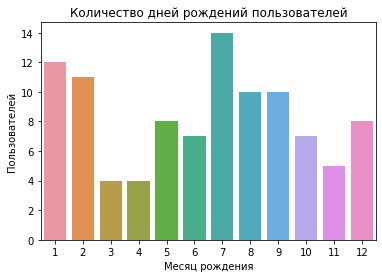

In [66]:
#построим столбчатую диаграмму
sns.barplot(data=birth_month, x="Месяц рождения", y="Пользователей")
plt.title('Количество дней рождений пользователей');

Чаще всего пользователи празднуют свой день рождения в июле и августе, январе и феврале. Меньше всего дней рождений приходится на март, апрель и ноябрь. 

Это позволит нам отразить в бизнес-стратегии потенциальный рост спроса в указанные месяцы.

####Анализ постов пользователей

In [52]:
#еще раз ознакомимся со структурой данных
posts.head()

,post_id,title,body,user_id,tags,reactions
0,1,His mother had always taught him,His mother had always taught him not to ever t...,9,"[history, american, crime]",2
1,2,He was an expert but not in a discipline,He was an expert but not in a discipline that ...,13,"[french, fiction, english]",2
2,3,Dave watched as the forest burned up on the hill.,Dave watched as the forest burned up on the hi...,32,"[magical, history, french]",5
3,4,All he wanted was a candy bar.,All he wanted was a candy bar. It didn't seem ...,12,"[mystery, english, american]",1
4,5,Hopes and dreams were dashed that day.,Hopes and dreams were dashed that day. It shou...,41,"[crime, mystery, love]",2


Для более детального анализа постов добавим в таблицу данные пользователей (в частности, наиболее информативны будут пол и возраст авторов) - используем метод merge по общему ключу для обеих таблиц - `user_id`.

In [53]:
#воспользуемся методом merge 
df = posts.merge(users, on='user_id', how='left')

In [54]:
df.head(1)

,post_id,title,body,user_id,tags,reactions,first_name,last_name,maiden_name,age,...,company_city,company_coordinates_lat,company_coordinates_lng,company_postal_code,company_state,company_department,company_name,company_title,age_category,birth_month
0,1,His mother had always taught him,His mother had always taught him not to ever t...,9,"[history, american, crime]",2,Demetrius,Corkery,Gleason,22,...,Arvada,39.826708,-105.13668,80004,CO,Human Resources,Gorczany Group,Community Outreach Specialist,20-29,3


В первую очередь нас интересует как часто встречаются те или иные теги. В нашем датафрейме tags представлена вложеным списком. 

Пройдемся циклом по колонке tags, с помощью Numpy распакуем список и сделаем сводную таблицу частотности каждого из тегов.

In [55]:
#соберем все вложенные списки колонки tags в отедльный список
tag = []

for row in df['tags']:
    tag += row

In [56]:
#распакуем полученный список в датафрейм
tags = pd.DataFrame(np.array(tag).reshape(-1, 1)).add_prefix("col")

In [57]:
#построим сводную таблицу
#в данном случае нам придется дважды обратиться к функции rename, т.к. мы работаем с 1 столбцом и названия колонок дублируются
tags.groupby('col0').agg({
    'col0': 'count'}).rename(
        columns={
        'col0':'col1'
}).reset_index().rename(
        columns={
        'col0':'Тэг',
        'col1':'Кол-во постов'
}).sort_values(by='Кол-во постов', ascending=False)

,Тэг,Кол-во постов
3,english,48
0,american,47
1,classic,47
7,love,44
2,crime,43
6,history,41
4,fiction,38
5,french,37
9,mystery,34
8,magical,33


Чаще всего пользователи пишут посты на темы - `english, american, classic`. Посты на темы `mystery & magical` встречаются на 30% реже.

In [58]:
#сделаем сводную таблицу, чтобы проанализировать половозрастное распределение авторов постов
data = df.pivot_table(
    index=['age_category', 'gender'], 
    values='user_id', 
    aggfunc=['count']).droplevel(0,axis=1).reset_index().rename(
        columns={
        'gender':'Пол', 
        'age_category':'Возрастная группа',
        'user_id' : 'Пользователей'
})

In [59]:
#сделаем срез нашей сводной таблицы и построим графики в соответствии с полом автором
woman = data.query('Пол == "female"')

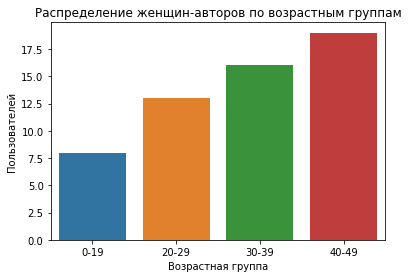

In [67]:
sns.barplot(data=woman, x="Возрастная группа", y="Пользователей")
plt.title('Распределение женщин-авторов по возрастным группам');

Среди авторов чаще других встречаются женщины старше 40 лет - по графику можно предположить, что чем старше женщина, тем больше она любит писать посты.

In [61]:
#аналогично делаем срез по мужчинам
man = data.query('Пол == "male"')

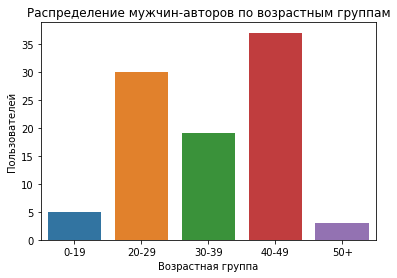

In [69]:
sns.barplot(data=man, x="Возрастная группа", y="Пользователей")
plt.title('Распределение мужчин-авторов по возрастным группам');

Среди мужчин-авторов нет такой тенденции к росту постов от возраста, которая просматривается у женщин - наиболее пишущая группа авторов в категории `40-49` лет, при этом достаточно много авторов встречается и в категории `20-29`.

##Выводы

Для проведения анализа была получена база с данными пользователей сайта игрушечных данных `Dummy Products` (`https://dummyjson.com`), период формирования данных неизвестен. Данные включают в себя 2 датасета с информацией о пользователях (ФИО, контактная информация, основные адреса пользвателей и др.) и постах пользователей (содержание, теги, id авторов).

Цели исследования заключались в определении портрета среднестатистического пользователя и факторов, которые необходимы для формирования стратегии запуска нового продукта -  возрастные категории товаров, географию доставки, параметры платежной системы для оплаты на маркетплейсе, а также анализе постов пользователей на платформе.

В процессе работы над проектом была проведена предобработка данных (изменение типа и обьединение данных, поиск дублей). Также был проведен исследовательский анализ данных.

**1.1. Общая характеристика портрета пользователей - пол и возраст**
<br />
Доли пользователей приложения распределены следующим образом:

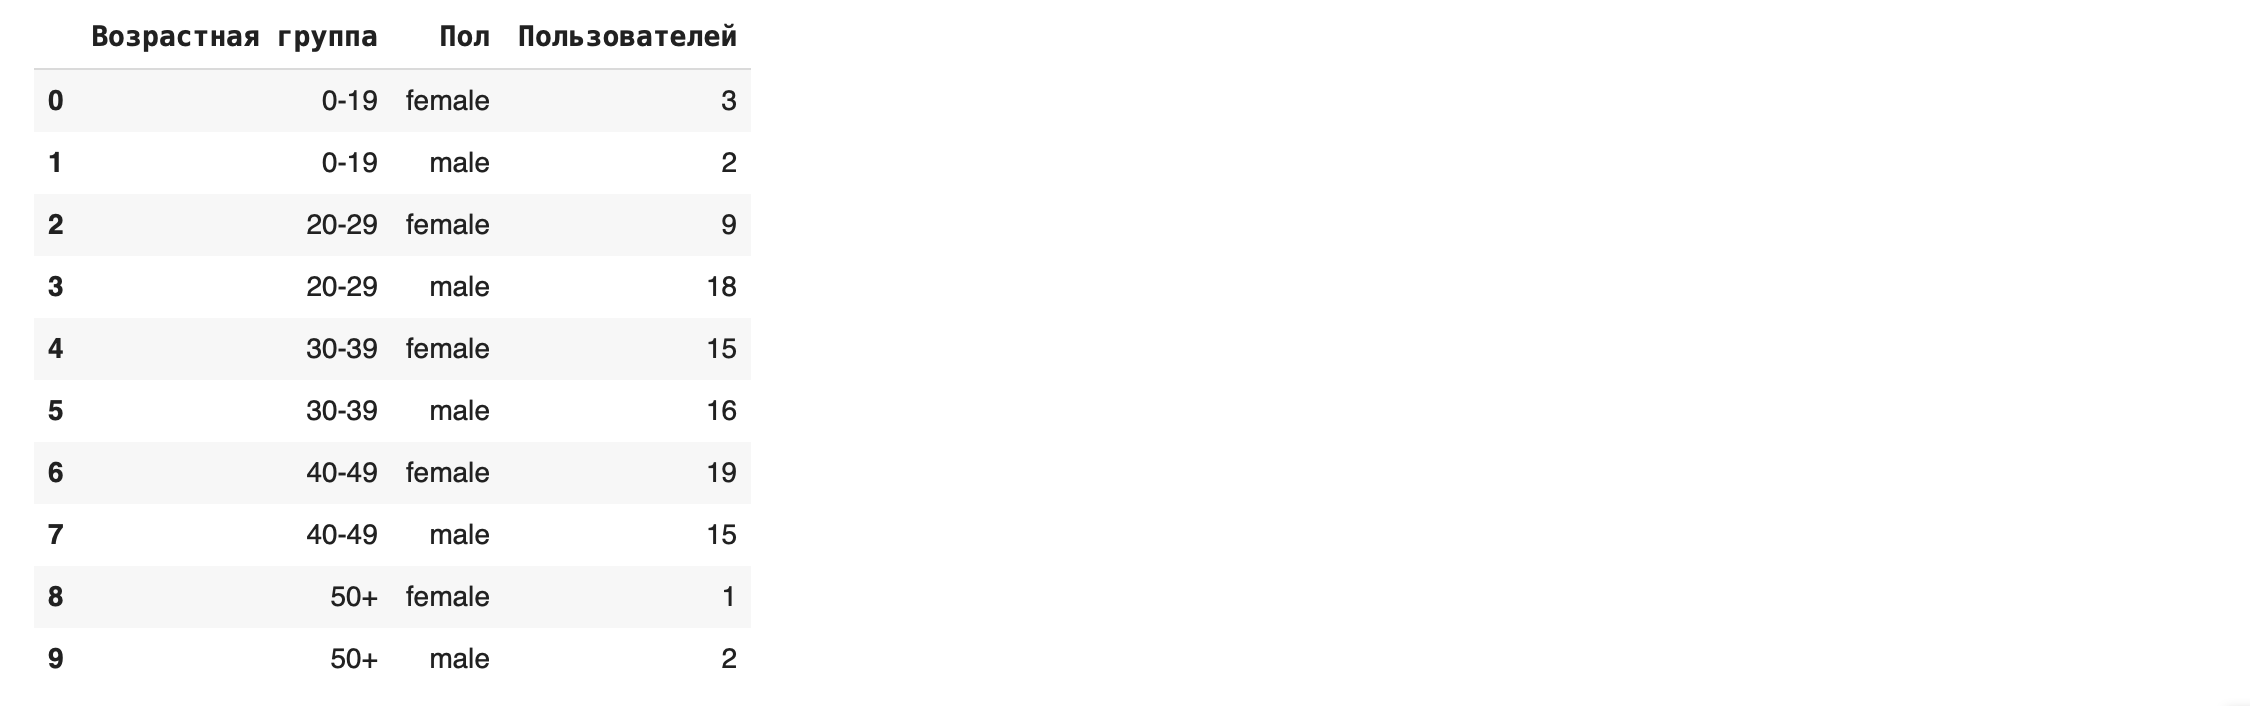

**1.2.1. Общая характеристика портрета пользователей - город проживания**
<br />
Доли пользователей по городам проживания:	
*   город `Nashville` - 10% пользователей;
*   город `Glendale` - 8% пользователей;
*   город `Anchorage` - 7% пользователей;
*   город `Washington` - 7% пользователей;
*   город `Manchester` - 7% пользователей;
*   город `Louisville` - 6% пользователей;
*   город `Fayetteville` - 6% пользователей;
*   город `Savannah` - 4% пользователей;
*   город `Montgomery` - 3% пользователей;
*   город `Panama City` - 3% пользователей;

На другие города приходится 39% пользователей.

**1.2.2. Общая характеристика портрета пользователей - город работы**
<br />
Доли пользователей по городам проживания:	
*   город `Fayetteville` - 11% пользователей
*   город `Glendale` - 10% пользователей;
*   город `Nashville` - 9% пользователей;
*   город `Washington` - 7% пользователей;
*   город `Manchester` - 7% пользователей;
*   город `Anchorage` - 6% пользователей;
*   город `Pasadena` - 3% пользователей;
*   город `Panama City` - 3% пользователей;
*   город `Glen Burnie` - 3% пользователей;
*   город `Grand Junctio` - 3% пользователей;

На другие города приходится 41% пользователей.

**1.2.3. Общая характеристика портрета пользователей - город работы**
<br />
Сопоставление географических координат городов проживания и работы:

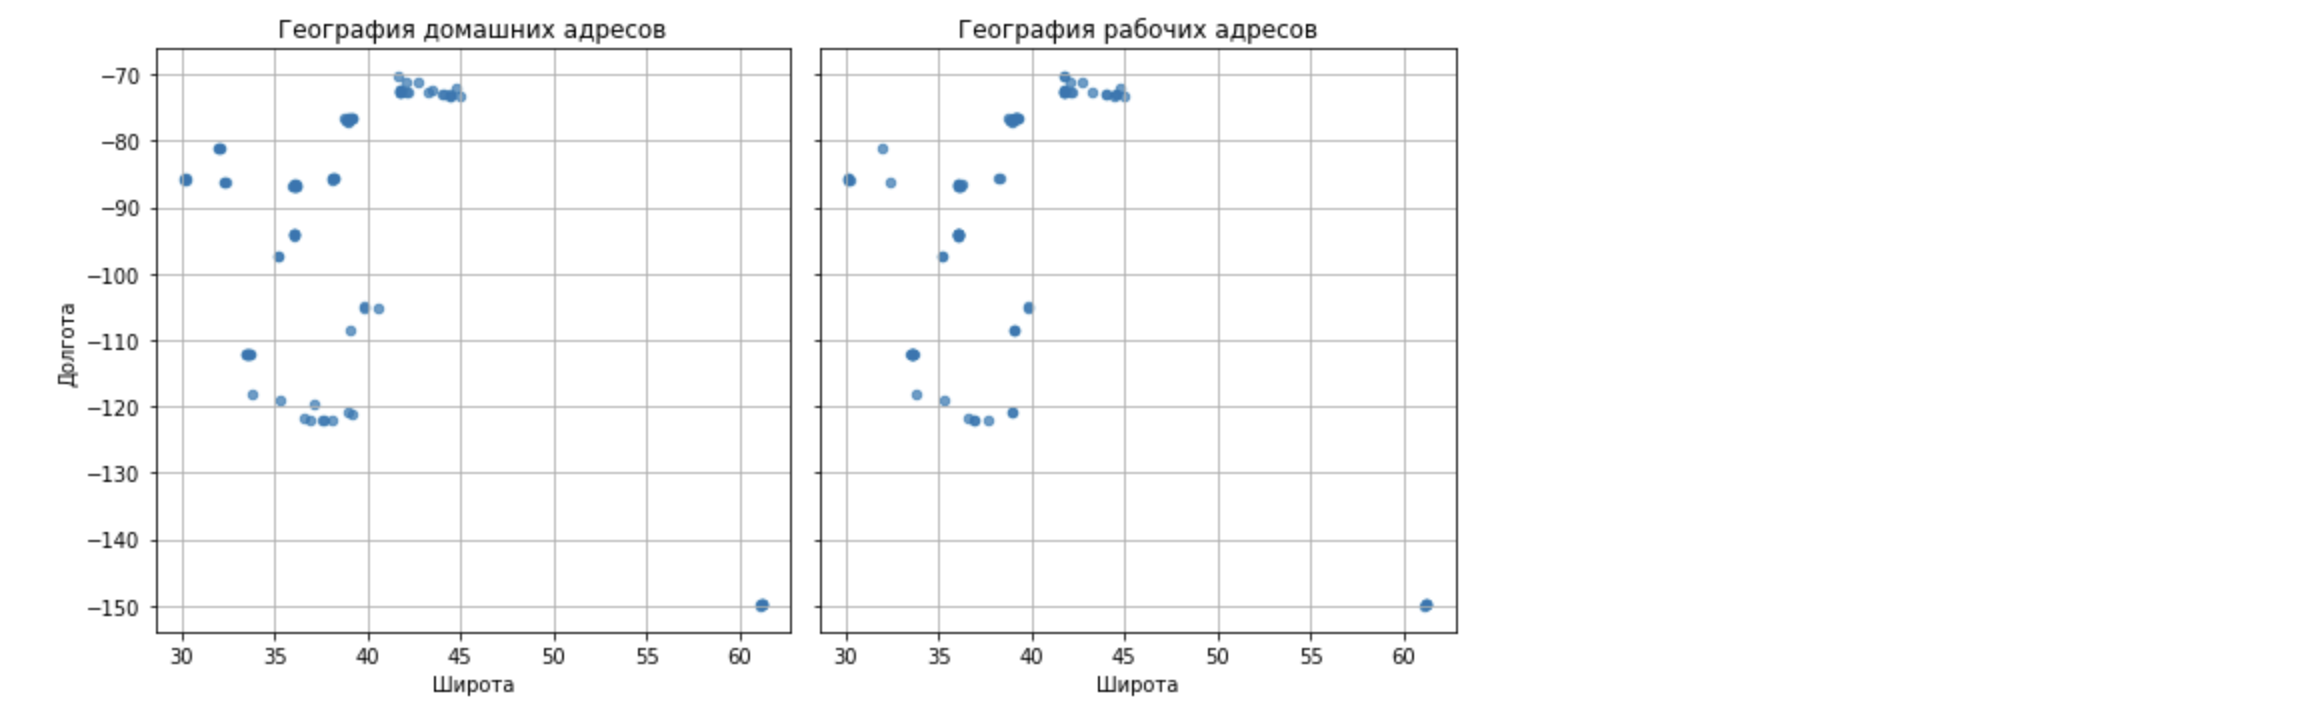


**Общая характеристика портрета пользователей - выводы**
<br />
Основой аудитории платформы (более 90% всех пользователей) практически в равной степени являются мужчины и женщины в возрасте от 20 до 50 лет. 

Группа пользователей `40-49` является самой многочисленной (при условии, что разница с группой `20-29` и `30-39` составляет не более 10%). 

Анализируя географию проживания и работы пользователей можно сделать вывод о маятниковой миграции - пользователи проживают в одном городе, рабочее место расположено в другом городе. 

При сопоставлении координат городов проживания и работы по географическим координатам мы видим практически полное перекрестное совпадение этих городов - фактически мы имеем пул конкретных городов, между которыми пользователи перемещаются из дома на работу и наоборот. 

Данный факт в будущем позволит оптимизировать развитие представительств, логистики и маршрутов доставик. 


**2.1. Характеристика пользовательских платежей - платежные системы**
<br />
Доли держателей карт платежных систем:

*   система `JCB` - 46% пользователей;
*   система `Diners-Club-Enroute` - 9% пользователей;
*   система `Maestro` - 9% пользователей;
*   система `Mastercard` - 7% пользователей;
*   система `Diners-Club-Carte-Blanche` - 5% пользователей;

На другие платежные системы приходится 24% держателей среди пользователей. 

**2.2. Характеристика пользовательских платежей - платежные системы**
<br />
Распределение валют карт пользователей:
*   система `Yuan Renminbi` - 18% пользователей;
*   система `Rupiah` - 14% пользователей;
*   система `Euro` - 11% пользователей;
*   система `Peso` - 10% пользователей;
*   система `Dollar` - 8% пользователей;

На другие валюты приходится 39% карт пользователей. 

Указаные платежные системы (в первую очередь `JCB`) и валюты должны быть интегрированы в продукт и поддерживаться при проведении платежей в первую очередь (при условии развития в данном географическом районе).

**3. Прогнозирование спроса - фактор дня рождения**
<br />
По известным данным дней рождений пользователей мы рассчитали, в какие месяцы года пользователи отмечают этот праздник, что потенциально может быть полезно отделу маркетинга для прогнозирования спроса:


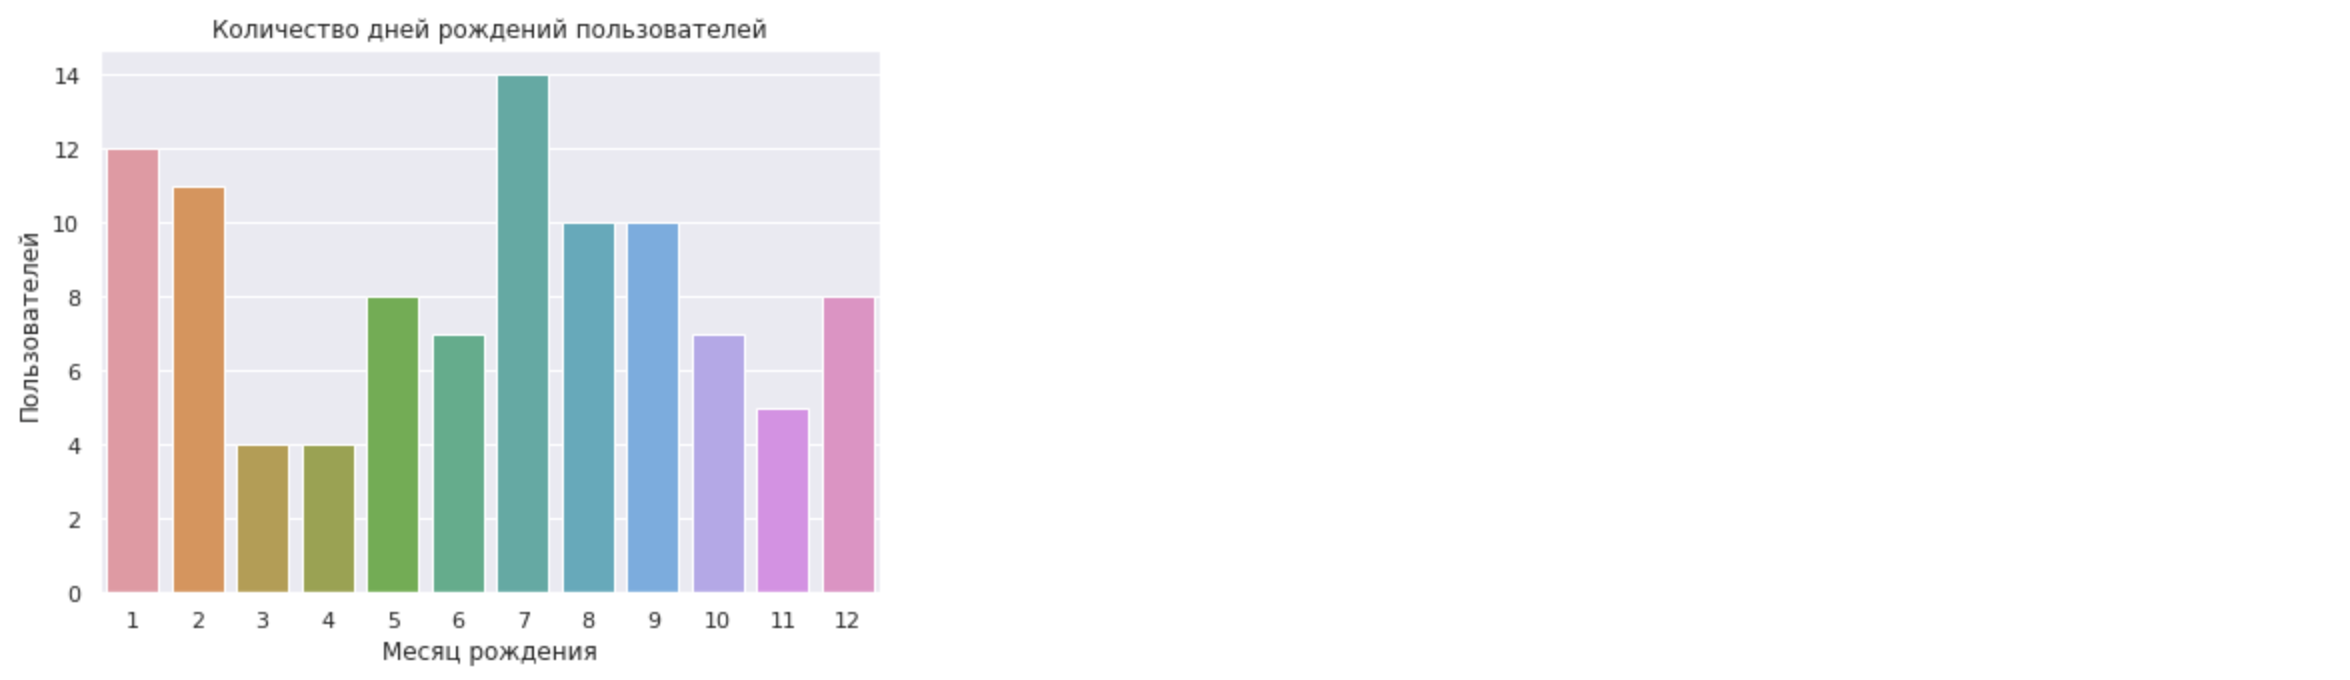

Чаще всего пользователи празднуют свой день рождения в июле и августе, январе и феврале. Меньше всего дней рождений приходится на март, апрель и ноябрь. 

**4. Тематические теги постов пользователей**
<br />
Анализируя датафрейм с постами пользователей можно выделить следующие наиболее популярные теги:
*   тег `english` используют 11,7% пользователей;
*   тег `american` - 11,4% пользователей;
*   тег `classic` - 11,4% пользователей;
*   тег `love` - 10,6% пользователей;
*   тег `crime` - 10,4% пользователей;
*   тег `history` используют 9,9% пользователей;
*   тег `fiction` - 9,2% пользователей;
*   тег `french` - 8,9% пользователей;
*   тег `mystery` - 8,2% пользователей;
*   тег `magical` - 8% пользователей;

Теги `english, american, classic` используются пользователями чаще всего, теги `mystery & magical` встречаются на 30% реже самых популярных тегов, что потенциально может быть полезно отделу маркетинга для понимания интересов потенциальной аудитории и выстраивания маркетинговых стратегий.

**5. Распределение авторов по половозрастным группам**
<br />


*   Среди авторов-женщин количество авторов изменяется по нарасающей в каждой возрастной группе, за исключением 50+ (авторы женщины этой возрастной категории отсуствуют); 
*   Среди авторов-мужчин не проглядывается четкого тренда зависимости количества авторов от возраста - чаще других авторами являются пользователи группы `20-29` и `40-49`, также, в отличие от женщин, присутсвуют авторы 50+.
* Как среди мужчин, так и среди женщин, чаще всего пишут авторы категории `40-49`.

